<a href="https://colab.research.google.com/github/Learnheart/URL-Classification/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras import layers, models
from keras.callbacks import EarlyStopping
from keras.layers import MaxPooling1D
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

!pip3 install pyvi
from pyvi import ViUtils
from tensorflow.keras.utils import plot_model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.2 MB/s eta 0:00:00


In [ ]:
print(sklearn.__version__)

1.4.1.post1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
names=['URL','Category']
df = pd.read_csv('/content/drive/MyDrive/NCKH/Data/full training data.csv',names=names, usecols=[0,2],na_filter=False, encoding='latin-1')
print(df.shape)
df.tail(10)

(379119, 2)


,URL,Category
379109,https://tainguyenvamoitruong.vn/cong-bo-ket-qu...,Environment
379110,https://tainguyenvamoitruong.vn/de-xuat-lap-sa...,Environment
379111,https://tainguyenvamoitruong.vn/chu-dong-kiem-...,Environment
379112,https://tainguyenvamoitruong.vn/hai-duong-tran...,Environment
379113,https://tainguyenvamoitruong.vn/hoan-thien-khu...,Environment
379114,https://tainguyenvamoitruong.vn/hanh-vi-xa-rac...,Environment
379115,https://tainguyenvamoitruong.vn/vinh-phuc-lay-...,Environment
379116,https://tainguyenvamoitruong.vn/tim-ra-nguyen-...,Environment
379117,https://tainguyenvamoitruong.vn/bac-bo-va-bac-...,Environment
379118,https://tainguyenvamoitruong.vn/trang-trai-nuo...,Environment


In [ ]:
def url_to_text(url):
  # remove stopwords
  url = url.replace('.html','').replace('.htm','').replace('http://','').replace('https://','')
  url = re.sub('^(.*?/)','/', url) # remove domains
  url = re.sub('[0-9]+', '', url)
  url = re.sub('[_\-/]+', ' ', url)

  return ViUtils.remove_accents(url.lower()).decode()

df['URL'] = df['URL'].apply(url_to_text)

dataset = df[:]
train, test = train_test_split(dataset, random_state=33, test_size=0.1)
train, val = train_test_split(train, random_state=44, test_size=0.2)
train.tail()
val.tail()
test.tail()

,URL,Category
205946,giai ma con giap khong can than la de mac han...,Science & Technology
141599,am thuc ngon quen sau voi thit ngam vi huong ...,Food & Drink
151951,bun dau hang khay co tuyen,Food & Drink
45137,tai lieu hoan thien nghiep vu tu van xac dinh...,Business & Finance
355610,en g the walking merge,Games


#Visualize data

In [ ]:
unique_names = df['Category'].unique()
print("Unique names in the column:", unique_names)

Unique names in the column: ['Automotive' 'Books & Literature' 'Business & Finance' 'Careers'
 'Education' 'Entertainment & Art' 'Family & Relationships' 'Food & Drink'
 'Healthy Living' 'Home & Garden' 'News & Politics' 'Science & Technology'
 'Sports' 'Style & Fashion' 'Travel' 'Real Estate' 'Games'
 'Laws & Policies' 'Environment']


(379119, 2)

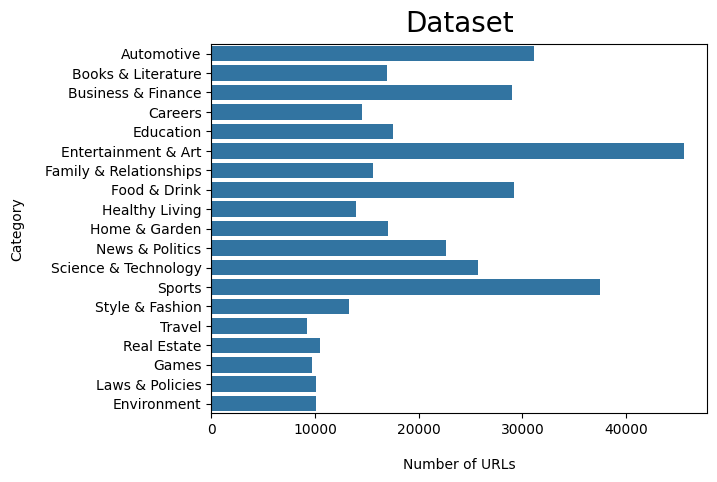

In [ ]:
import seaborn as sns
ax = sns.countplot(y="Category", data=dataset, order= ['Automotive', 'Books & Literature', 'Business & Finance', 'Careers',
 'Education', 'Entertainment & Art', 'Family & Relationships', 'Food & Drink',
 'Healthy Living', 'Home & Garden', 'News & Politics', 'Science & Technology',
 'Sports', 'Style & Fashion', 'Travel', 'Real Estate', 'Games',
 'Laws & Policies', 'Environment'])
plt.title("Dataset", y=1.01, fontsize=20)
plt.ylabel("Category", labelpad=15)
plt.xlabel("Number of URLs",labelpad=15)
df.shape

Text(0.5, 0, 'Number of URLs')

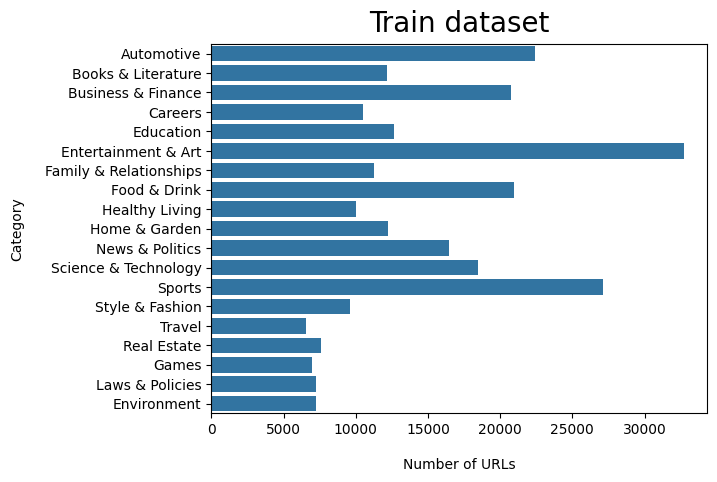

In [ ]:
ax = sns.countplot(y="Category",  data=train, order=['Automotive', 'Books & Literature', 'Business & Finance', 'Careers',
 'Education', 'Entertainment & Art', 'Family & Relationships', 'Food & Drink',
 'Healthy Living', 'Home & Garden', 'News & Politics', 'Science & Technology',
 'Sports', 'Style & Fashion', 'Travel', 'Real Estate', 'Games',
 'Laws & Policies', 'Environment'])
plt.title("Train dataset", y=1.01, fontsize=20)
plt.ylabel("Category", labelpad=15)
plt.xlabel("Number of URLs", labelpad=15)

Text(0.5, 0, 'Number of URLs')

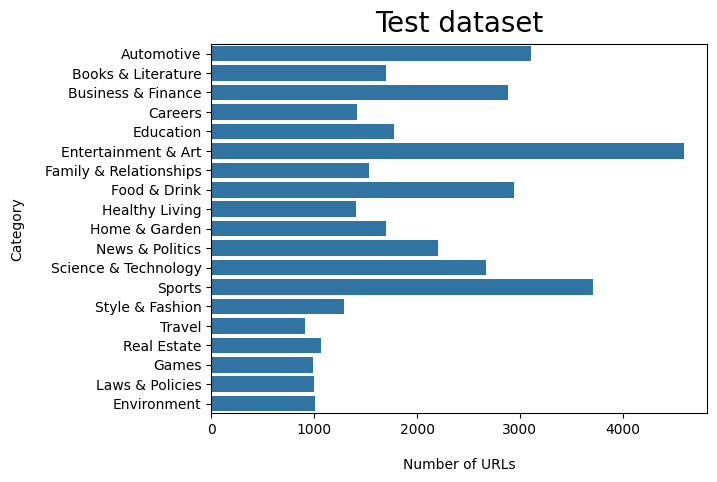

In [ ]:
ax = sns.countplot(y = "Category",  data = test, order=['Automotive', 'Books & Literature', 'Business & Finance', 'Careers',
 'Education', 'Entertainment & Art', 'Family & Relationships', 'Food & Drink',
 'Healthy Living', 'Home & Garden', 'News & Politics', 'Science & Technology',
 'Sports', 'Style & Fashion', 'Travel', 'Real Estate', 'Games',
 'Laws & Policies', 'Environment',])
plt.title("Test dataset", y=1.01, fontsize=20)
plt.ylabel("Category", labelpad=15)
plt.xlabel("Number of URLs", labelpad=15)


In [ ]:
x_train=train['URL']
y_train=train['Category']
print( 'Train shape' , train.shape)

x_val=val['URL']
y_val=val['Category']
print( 'Val shape' , val.shape)

x_test=test['URL']
y_test=test['Category']
print( 'Test shape' , test.shape)

Train shape (272965, 2)
Val shape (68242, 2)
Test shape (37912, 2)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix

vectorizer = CountVectorizer() #transforms text data into numerical feature vectors
pipeline = Pipeline([ #pipeline contain all compponents as tuple
    ('vect', vectorizer),
    ('chi',  SelectKBest(chi2, k=1200)), #uses the chi-squared (chi2) statistical test to select the k=1200 best features.
    ('clf', DecisionTreeClassifier())
])


# Fit the model
model = pipeline.fit(x_train, y_train)
# Evaluate the model on the test set
y_test_pred = model.predict(x_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


                        precision    recall  f1-score   support

            Automotive       0.98      0.96      0.97      3108
    Books & Literature       0.84      0.97      0.90      1695
    Business & Finance       0.98      0.98      0.98      2887
               Careers       0.96      0.92      0.94      1415
             Education       0.99      0.98      0.99      1772
   Entertainment & Art       0.96      0.95      0.95      4593
           Environment       0.79      0.76      0.77      1013
Family & Relationships       0.90      0.90      0.90      1530
          Food & Drink       0.90      0.91      0.90      2943
                 Games       0.93      0.93      0.93       984
        Healthy Living       0.96      0.95      0.95      1407
         Home & Garden       0.97      0.97      0.97      1702
       Laws & Policies       0.86      0.86      0.86       995
       News & Politics       0.91      0.89      0.90      2203
           Real Estate       0.80      

In [ ]:
new_input_url = 'https://gamevui.vn/pikachu/game'
new_input_processed = url_to_text(new_input_url)

# Make prediction for the new input
prediction_encoded = model.predict([new_input_processed])

print("Predicted Class:", prediction_encoded)

Predicted Class: ['Games']


In [ ]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/NCKH/HyperModel/naive_bayes_1.4.1.pkl')


['/content/drive/MyDrive/NCKH/HyperModel/naive_bayes_1.4.1.pkl']

In [ ]:
model = joblib.load('/content/drive/MyDrive/NCKH/HyperModel/naive_bayes_1.4.1.pkl')
predicted = model.predict([new_input_processed])
print(predicted)

['Games']


#Origin Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Initialize CountVectorizer to convert text to numerical features
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(x_train)

# Transform validation and test data
X_val_vectorized = vectorizer.transform(x_val)
X_test_vectorized = vectorizer.transform(x_test)

# Convert multi-dimensional y_train, y_val, y_test to single label
# y_train_single_label = y_train.argmax(axis=1)
# y_val_single_label = y_val.argmax(axis=1)
# y_test_single_label = y_test.argmax(axis=1)

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Predictions on validation set
y_pred_val = nb_classifier.predict(X_val_vectorized)

# Evaluate performance on validation set
accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred_val))

# Final evaluation on test set
y_pred_test = nb_classifier.predict(X_test_vectorized)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, y_pred_test))

Validation Accuracy: 0.929178511766947
                        precision    recall  f1-score   support

            Automotive       1.00      0.94      0.97      5620
    Books & Literature       0.99      0.94      0.97      3065
    Business & Finance       0.93      0.98      0.95      5311
               Careers       0.98      0.97      0.97      2645
             Education       0.96      0.96      0.96      3100
   Entertainment & Art       0.87      0.97      0.92      8236
           Environment       0.91      0.72      0.80      1848
Family & Relationships       0.82      0.87      0.84      2785
          Food & Drink       0.95      0.92      0.94      5299
                 Games       0.95      0.86      0.90      1715
        Healthy Living       0.88      0.89      0.89      2492
         Home & Garden       0.93      0.98      0.95      3092
       Laws & Policies       0.92      0.84      0.88      1785
       News & Politics       0.88      0.92      0.90      4028


In [ ]:
# Calculate accuracy on training set
y_pred_train = nb_classifier.predict(X_train_vectorized)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)

# Calculate accuracy on test set
y_pred_test = nb_classifier.predict(X_test_vectorized)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9331599289286172
Test Accuracy: 0.9287033129352184


In [ ]:
# try:
#     loss_train = history.history['loss']
#     loss_val = history.history['val_loss']
#     epochs = range(1,61)
#     plt.plot(epochs, loss_train, 'g', label='Training loss')
#     plt.plot(epochs, loss_val, 'b', label='validation loss')
#     plt.title('Training and Validation loss')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend(),
#     plt.show()
# except:
#     pass

In [ ]:
# try:
#     loss_train = history.history['accuracy']
#     loss_val = history.history['val_accuracy']
#     epochs = range(1,61)
#     plt.plot(epochs, loss_train, 'g', label='Training accuracy')
#     plt.plot(epochs, loss_val, 'b', label='validation accuracy')
#     plt.title('Training and Validation accuracy')
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.show()
# except:
#     pass

In [ ]:
new_input_url = 'https://vnexpress.net/loat-phim-ra-rap-thang-3-4431567.html'
new_input_processed = url_to_text(new_input_url)

# Make prediction for the new input
prediction_encoded = nb_classifier.predict(vectorizer.transform([new_input_processed]))

print("Predicted Class:", prediction_encoded)

Predicted Class: ['Entertainment & Art']


#Hyper tuning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix

vectorizer = CountVectorizer() #transforms text data into numerical feature vectors
pipeline = Pipeline([ #pipeline contain all compponents as tuple
    ('vect', vectorizer),
    ('chi',  SelectKBest(chi2, k=1200)), #uses the chi-squared (chi2) statistical test to select the k=1200 best features.
    ('clf', DecisionTreeClassifier())
])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Initialize CountVectorizer to convert text to numerical features
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(x_train)

# Transform validation and test data
X_val_vectorized = vectorizer.transform(x_val)
X_test_vectorized = vectorizer.transform(x_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
import logging

logging.basicConfig(level=logging.INFO)
logging.info("Grid search started...")

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Define the parameter grid for grid search
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Perform grid search
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_vectorized, y_train)

# Log when grid search completes
logging.info("Grid search completed.")

# Accessing cross-validated scores
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
params = cv_results['params']

# Logging progress
for mean_score, params in zip(mean_test_scores, params):
    logging.info("Mean Test Score: %f", mean_score)
    logging.info("Hyperparameters: %s", params)


for mean_score, params in zip(mean_test_scores, params):
    print("Mean test score: ", mean_score)
    print("Hyperparameter", params)
    print("-------------------")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mean test score:  0.9333101313355192
Hyperparameter alpha
-------------------


In [ ]:
# Get the best model
best_nb_classifier = grid_search.best_estimator_

# Predictions on validation set
y_pred_val = best_nb_classifier.predict(X_val_vectorized)

# Evaluate performance on validation set
accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred_val))

# Final evaluation on test set
y_pred_test = best_nb_classifier.predict(X_test_vectorized)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, y_pred_test))

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Validation Accuracy: 0.9340728583570236
                        precision    recall  f1-score   support

            Automotive       1.00      0.95      0.97      5620
    Books & Literature       0.99      0.95      0.97      3065
    Business & Finance       0.94      0.97      0.95      5311
               Careers       0.98      0.98      0.98      2645
             Education       0.96      0.96      0.96      3100
   Entertainment & Art       0.90      0.95      0.93      8236
           Environment       0.87      0.77      0.82      1848
Family & Relationships       0.82      0.87      0.84      2785
          Food & Drink       0.96      0.93      0.94      5299
                 Games       0.95      0.91      0.93      1715
        Healthy Living       0.88      0.90      0.89      2492
         Home & Garden       0.93      0.98      0.95      3092
       Laws & Policies       0.92      0.86      0.89      1785
       News & Politics       0.89      0.91      0.90      4028

In [ ]:
new_input_url = 'https://vnexpress.net/loat-phim-ra-rap-thang-3-4431567.html'
new_input_processed = url_to_text(new_input_url)

# Make prediction for the new input
prediction = best_nb_classifier.predict(vectorizer.transform([new_input_processed]))

print("Predicted Class:", prediction)

Predicted Class: ['Entertainment & Art']


In [ ]:
# Calculate accuracy on training set
hyper_y_pred_train = best_nb_classifier.predict(X_train_vectorized)
hyper_train_accuracy = accuracy_score(y_train, hyper_y_pred_train)
print("Train Accuracy:", hyper_train_accuracy)

# Calculate accuracy on test set
hyper_y_pred_test = best_nb_classifier.predict(X_test_vectorized)
hyper_test_accuracy = accuracy_score(y_test, hyper_y_pred_test)
print("Test Accuracy:", hyper_test_accuracy)

Train Accuracy: 0.9420475152492078
Test Accuracy: 0.934400717450939


In [ ]:
import joblib

# Save the best model to a file
joblib.dump(best_nb_classifier, '/content/drive/MyDrive/NCKH/HyperModel/hyper_naive_bayes.pkl')

# Later, you can load the model from the file
loaded_model = joblib.load('/content/drive/MyDrive/NCKH/HyperModel/hyper_naive_bayes.pkl')

# Use the loaded model for predictions
y_pred_loaded = loaded_model.predict(X_test_vectorized)
test_accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print("Test Accuracy (Loaded Model):", test_accuracy_loaded)
print(classification_report(y_test, y_pred_loaded))


Test Accuracy (Loaded Model): 0.934400717450939
                        precision    recall  f1-score   support

            Automotive       1.00      0.94      0.97      3108
    Books & Literature       0.99      0.95      0.97      1695
    Business & Finance       0.94      0.97      0.95      2887
               Careers       0.98      0.98      0.98      1415
             Education       0.96      0.95      0.96      1772
   Entertainment & Art       0.90      0.96      0.93      4593
           Environment       0.90      0.79      0.84      1013
Family & Relationships       0.83      0.86      0.84      1530
          Food & Drink       0.96      0.92      0.94      2943
                 Games       0.95      0.90      0.93       984
        Healthy Living       0.89      0.90      0.90      1407
         Home & Garden       0.92      0.97      0.95      1702
       Laws & Policies       0.91      0.86      0.89       995
       News & Politics       0.88      0.92      0.90  